In [2]:
from raw_python.Bagging import create_models, create_bags, evaluate
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn import datasets
from sklearn.tree import DecisionTreeClassifier
import numpy as np
import pandas as pd
import random
from raw_python.BaggingSA import BaggingSA

In [2]:
seed = 42
np.random.seed(seed)
random.seed(seed)
data = datasets.load_digits()


X = data.data
y = data.target
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=True)

In [ ]:
def evaluate_bagging(n_trees):
    bags = create_bags(X_train, n_trees)
    models = create_models(X=X_train, y=y_train, bags=bags)
    accuracy = evaluate(X_test, y_test, models=models)
    return accuracy

def evaluate_bagging_sa(n_trees):
    bagging_sa = BaggingSA(X=X_train, y=y_train,
                            T0=10, cooling_method='geometric', alpha=0.99, max_iterations=2500, n_trees=n_trees,
                            fitness_accuracy_disagreement_ratio=0.8,
                            feature_mutation_chance=0.3, test_split_amount=20)
    models = bagging_sa.run()
    accuracy = evaluate(X_test, y_test, models=models)
    return accuracy
    

def fun_monitor_sa(iteration, T, best_fitness, fitness, new_fitness, accuracy):
    pass
    # print(f"I: {iteration}, T: {T:.3f}, Best fitness: {best_fitness:.3f}, Fitness: {fitness:.3f}, New fitness: {new_fitness:.3f}, Accuracy: {accuracy:.3f}")

def evaluate_decision_tree():
    model = DecisionTreeClassifier()
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    return accuracy

In [4]:
n_trees = [5, 10, 15, 20, 25]
reps = 10

results = []

for n in n_trees:
    for r in range(reps):
        print(f"Running with {n} trees, repetition {r+1}/{reps}")
        dt_mean = evaluate_decision_tree()
        bagging_mean  = evaluate_bagging(n)
        bagging_sa_mean = evaluate_bagging_sa(n)
        
        results.append({
            'TreesAmount': n,
            'DecisionTree': dt_mean,
            'Bagging': bagging_mean,
            'BaggingSA': bagging_sa_mean,
        })
        results_df = pd.DataFrame(results)
        results_df.to_csv(f'./../res/bagging_multiple_results.csv', index=False)
        
print(results_df)

Evaluating Decision Tree with 5 trees, repetition 1/10
Evaluating Decision Tree with 5 trees, repetition 2/10
Evaluating Decision Tree with 5 trees, repetition 3/10
Evaluating Decision Tree with 5 trees, repetition 4/10
Evaluating Decision Tree with 5 trees, repetition 5/10
Evaluating Decision Tree with 5 trees, repetition 6/10
Evaluating Decision Tree with 5 trees, repetition 7/10
Evaluating Decision Tree with 5 trees, repetition 8/10
Evaluating Decision Tree with 5 trees, repetition 9/10
Evaluating Decision Tree with 5 trees, repetition 10/10
Evaluating Decision Tree with 10 trees, repetition 1/10
Evaluating Decision Tree with 10 trees, repetition 2/10
Evaluating Decision Tree with 10 trees, repetition 3/10
Evaluating Decision Tree with 10 trees, repetition 4/10
Evaluating Decision Tree with 10 trees, repetition 5/10
Evaluating Decision Tree with 10 trees, repetition 6/10
Evaluating Decision Tree with 10 trees, repetition 7/10
Evaluating Decision Tree with 10 trees, repetition 8/10
E

KeyboardInterrupt: 

In [5]:
from tabulate import tabulate
df = pd.read_csv('./../res/bagging_multiple_results.csv')

result_df_aggregated = df.groupby('TreesAmount').agg(
    DecisionTreeMean=('DecisionTree', 'mean'),
    DecisionTreeStd=('DecisionTree', 'std'),
    BaggingMean=('Bagging', 'mean'),
    BaggingStd=('Bagging', 'std'),
    BaggingSAMean=('BaggingSA', 'mean'),
    BaggingSAStd=('BaggingSA', 'std'),
).reset_index()

result_df_aggregated.to_csv('./../res/bagging_multiple_results_aggregated.csv', index=False)

tmp = result_df_aggregated.copy().round(3)
print(tabulate(tmp, headers='keys', tablefmt='pretty', showindex=False))


+-------------+------------------+-----------------+-------------+------------+---------------+--------------+
| TreesAmount | DecisionTreeMean | DecisionTreeStd | BaggingMean | BaggingStd | BaggingSAMean | BaggingSAStd |
+-------------+------------------+-----------------+-------------+------------+---------------+--------------+
|     5.0     |      0.854       |      0.009      |    0.753    |   0.047    |     0.834     |    0.022     |
|    10.0     |      0.854       |      0.008      |    0.837    |   0.028    |     0.887     |    0.013     |
|    15.0     |      0.854       |      0.012      |    0.894    |   0.014    |     0.915     |    0.016     |
+-------------+------------------+-----------------+-------------+------------+---------------+--------------+


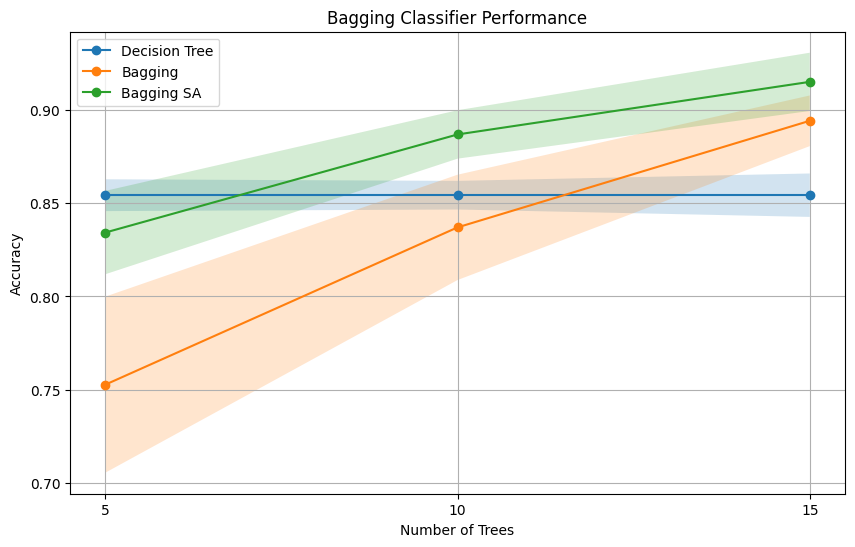

In [6]:
import matplotlib.pyplot as plt

results_df = pd.read_csv(f'./../res/bagging_multiple_results_aggregated.csv')

plt.figure(figsize=(10, 6))

X = results_df['TreesAmount']
dt_mean = results_df['DecisionTreeMean']
dt_std = results_df['DecisionTreeStd']
bagging_mean = results_df['BaggingMean']
bagging_std = results_df['BaggingStd']
bagging_sa_mean = results_df['BaggingSAMean']
bagging_sa_std = results_df['BaggingSAStd']

plt.plot(X, dt_mean, marker='o', label='Decision Tree')
plt.fill_between(X, dt_mean - dt_std, dt_mean + dt_std, alpha=0.2)

plt.plot(X, bagging_mean, marker='o', label='Bagging')
plt.fill_between(X, bagging_mean - bagging_std, bagging_mean + bagging_std, alpha=0.2)

plt.plot(X, bagging_sa_mean, marker='o', label='Bagging SA')
plt.fill_between(X, bagging_sa_mean - bagging_sa_std, bagging_sa_mean + bagging_sa_std, alpha=0.2)

plt.title('Bagging Classifier Performance')
plt.xlabel('Number of Trees')
plt.ylabel('Accuracy')
plt.legend()
plt.xticks(X)
plt.grid()
# plt.savefig('./../res/bagging_multiple_results.png')